In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from pmdarima.arima import auto_arima

In [2]:
#Read data from csv file
data = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)
display(data)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [3]:
#Define the month and year as index
month_year = data.index
print(month_year)
#Define the passengers for each month_year
Passenger = data['#Passengers']

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)


In [4]:
#Define training and testing data
train = data.loc['1949-01-01':'1959-12-01']
test = data.loc['1960-01-01':] #Last year
display(train)
display(test)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [5]:
#Create a model from the train data
time_model_train = auto_arima(train, start_p=1, start_d= 0, start_q=1,  max_p=3, max_d=2, max_q=5, start_P=0,  seasonal=True, m=12, trace=True, stepwise=False)

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1022.029, Time=0.11 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=1023.211, Time=0.36 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.13 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=1022.266, Time=1.01 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1022.869, Time=0.53 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=1024.889, Time=0.52 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=965.311, Time=0.06 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.16 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=965.277, Time=0.47 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=963.317, Time=0.20 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=967.282, Time=0.75 sec
 ARIMA(0,0,1)(2

This code is using the auto_arima function from the pmdarima library to fit an auto-regressive integrated moving average (ARIMA) model to the time series data. ARIMA is a popular method for time series forecasting that combines both autoregression (AR) and moving average (MA) models to produce a more accurate prediction.

The start_p, start_q, start_d, start_P parameters specify the starting values for the autoregression (p), moving average (q), differences (d), and seasonal autoregression (P) orders. The max_p and max_q parameters specify the maximum values for p and q respectively. The seasonal parameter specifies whether the model should have a seasonal component or not. The m parameter specifies the number of time steps in the seasonal component. The trace parameter is a boolean that controls whether the function displays the intermediate steps in the optimization process or not. The stepwise parameter is a boolean that determines whether the function should use stepwise optimization to determine the ARIMA orders or not.

The function returns an ARIMA model object that has been fitted to the input data. The model can then be used to make predictions on future time series data.

In [6]:
#Display a summary of the training model
print(time_model_train.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(1, 1, [1, 2], 12)   Log Likelihood                -443.979
Date:                                 Mon, 13 Feb 2023   AIC                            901.959
Time:                                         22:19:16   BIC                            921.471
Sample:                                     01-01-1949   HQIC                           909.883
                                          - 12-01-1959                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1559      0.708      0.220      0.826      -1.231       1

In [7]:
#Predict the test data
test_forecast = time_model_train.predict(n_periods=12)

Text(0, 0.5, 'Passengers')

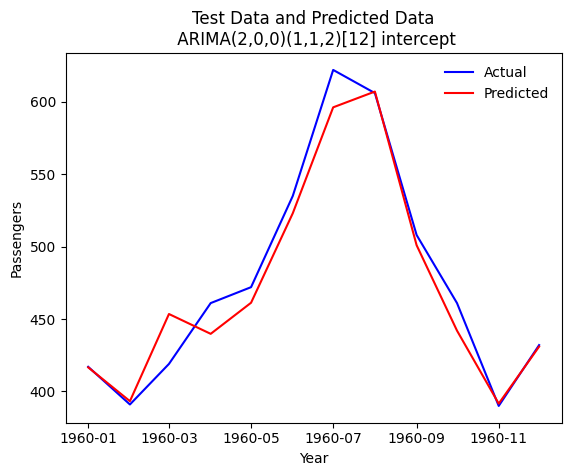

In [8]:
#Plot the test data (last year) and the predicted data
plt.title('Test Data and Predicted Data' + '\n' + str(time_model_train), loc='center')
plt.plot(test, color = 'blue', label = 'Actual')
plt.plot(test_forecast, color='red', label = 'Predicted')
plt.legend(loc='best', frameon=False)
plt.xlabel('Year')
plt.ylabel('Passengers')

Text(0, 0.5, 'Passengers')

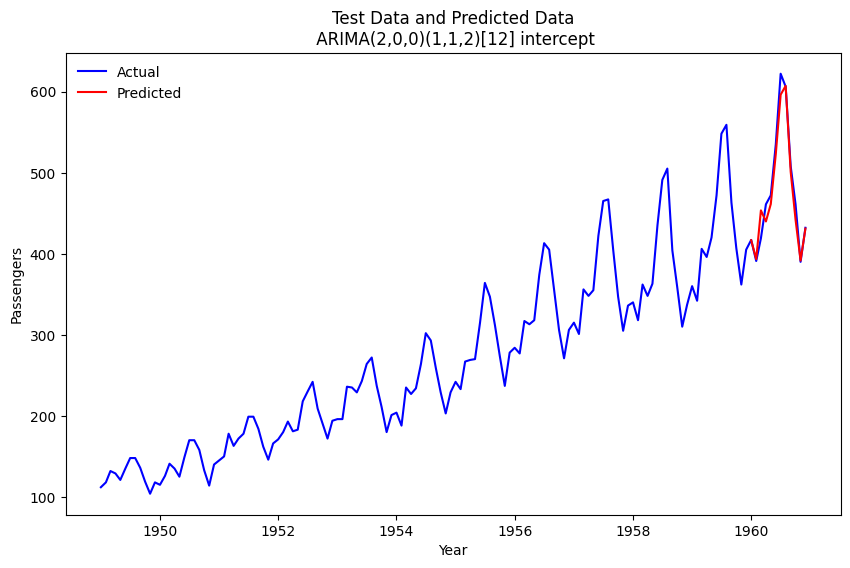

In [9]:
#Plot the data and the predicted data
plt.figure(figsize=(10,6))
plt.title('Test Data and Predicted Data' + '\n' + str(time_model_train), loc='center')
plt.plot(Passenger, color = 'blue', label = 'Actual')
plt.plot(test_forecast, color='red', label = 'Predicted')
plt.legend(loc='best', frameon=False)
plt.xlabel('Year')
plt.ylabel('Passengers')

In [10]:
#Forecast the next 12 months using all the data
time_model = auto_arima(data, start_p=1, start_d= 0, start_q=1,  max_p=3, max_d=2, max_q=5, start_P=0,  seasonal=True, m=12, trace=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.07 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.30 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.05 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.12 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=0.50 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.14 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.29 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=1.31 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.09 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=0.49 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.22 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=0.84 sec
 ARIM

In [11]:
#Display a summary of the model
print(time_model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -501.495
Date:                                 Mon, 13 Feb 2023   AIC                           1012.991
Time:                                         22:19:56   BIC                           1027.367
Sample:                                     01-01-1949   HQIC                          1018.832
                                          - 12-01-1960                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4279      0.063     -6.756      0.000      -0.552      -0

In [63]:
#Predict the next 12 months with a confidence level of 95%
forecast, confint = time_model.predict(n_periods=12, return_conf_int=True, alpha=0.05)
lower = confint[:, 0]
upper = confint[:, 1]


In [65]:
#Summary of forecast results
future_dates = pd.DataFrame(forecast.index, columns=['Month'])
forecast_df = pd.DataFrame(forecast.values, columns=['forecast'])
lower = pd.DataFrame(lower, columns=['lower'])
upper = pd.DataFrame(upper, columns=['upper'])
df = pd.concat([future_dates, forecast_df, lower, upper], axis=1)

display(df)

,Month,forecast,lower,upper
0,1961-01-01,450.053613,429.175487,470.931740
1,1961-02-01,422.963495,398.916071,447.010919
2,1961-03-01,465.827879,438.982750,492.673008
3,1961-04-01,490.334823,460.957224,519.712421
4,1961-05-01,507.781544,476.073097,539.489991
5,1961-06-01,575.302540,541.423225,609.181855
6,1961-07-01,663.439945,627.520726,699.359164
7,1961-08-01,657.623670,619.774328,695.473012
8,1961-09-01,549.387561,509.701858,589.073264
9,1961-10-01,495.696128,454.255359,537.136897


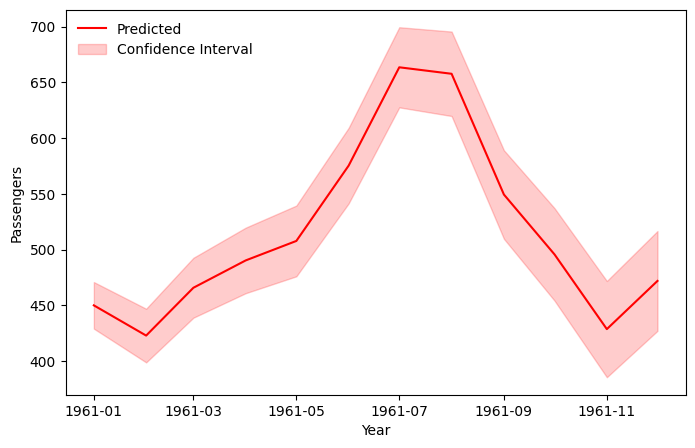

In [66]:
#Plot only the forecast results
plt.figure(figsize=(8,5))
plt.plot(forecast, color='red', label = 'Predicted')

# make series for plotting purpose
lower = pd.Series(confint[:, 0])
upper = pd.Series(confint[:, 1])

#plot the confidence intervals
plt.fill_between(forecast.index, lower, upper, color='r', alpha=0.2, label='Confidence Interval')

plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend(loc='upper left', frameon=False)

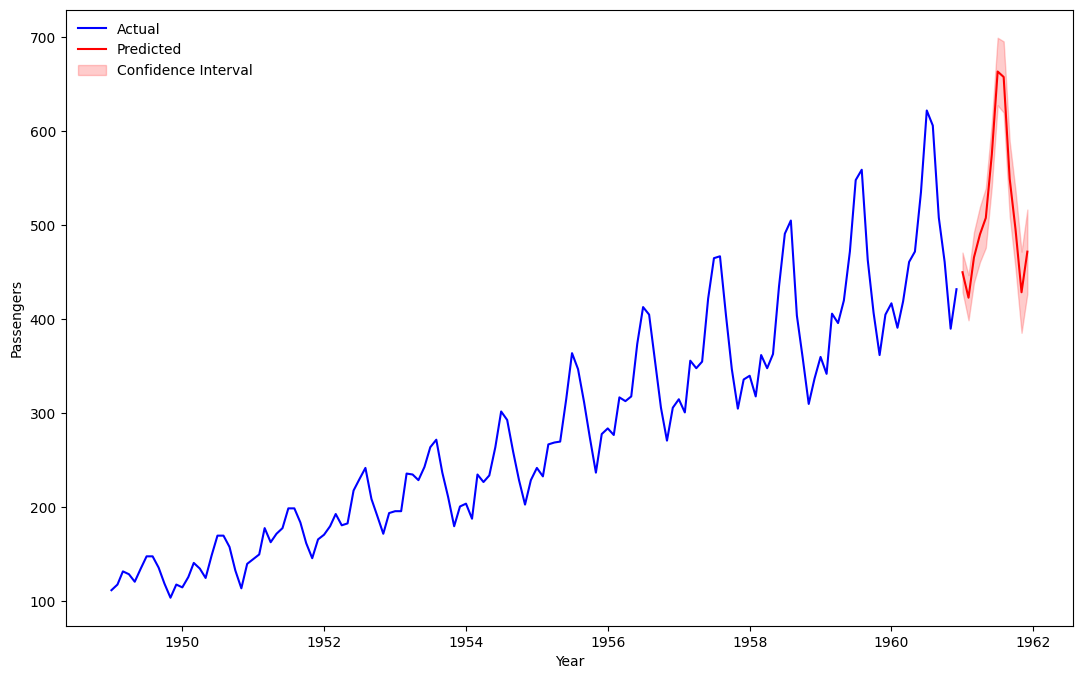

In [67]:
#Plot the forecast results with all data points
plt.figure(figsize=(13,8))
plt.plot(data, color = 'blue', label = 'Actual')
plt.plot(forecast, color='red', label = 'Predicted')
plt.fill_between(forecast.index, lower, upper, color='r', alpha=0.2, label='Confidence Interval')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend(loc='upper left', frameon=False)